<a href="https://colab.research.google.com/github/jpmortaza/analise_youtube/blob/main/Pandorga_tech_%3Eyoutube_legendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDORGA TECH - EXTRAÇÃO E ANALISE TEXTUAL DE VÍDEO DO YOUTUBE (LEGENDA DO YOUTUBE)
Esse script Sugiu da necessidade de realizar a analise semantica de diversos vídeos do youtube, precisavamos criar um relatório com as pautas mais abordadas por um candidato em seus vídeos, o interessante é que ele tinha mais de mil vídeos no youtube, o que seria impossível de ser realizado manualmente ou seja assistindo os vídeos.

Instruções de utilização.
1. Nos arquivos abra o arquivo de txt id_youtube
2. Insira nele os links dos vídeos que quer analisar. (vídeos que contenham legenda)
3. Execute o Buscar.
4. Os resultados serão salvos em um arquivo txt com o nome transcricao.
5. Faça donwload do arquivo e formate da forma que for mais útil.


Assista o vídeo abaixo:
[Vídeo Youtube](https://www.youtube.com/watch?v=42n878GWZeE)


# IMPORT/INSTALL

In [30]:
!pip install youtube-transcript-api
!pip install pytube
!pip install wordcloud -q

from pytube import extract
import pandas as pd
from youtube_transcript_api import YouTubeTranscriptApi
from wordcloud import WordCloud

import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# EXTRAI AS LEGENDAS

In [21]:
#EXTRAI AS LEGENDAS
with open("id_youtube.txt") as file:
    for link in file:
        id=extract.video_id(link)
        srt = YouTubeTranscriptApi.get_transcript(id,languages=['pt'])
        with open("transcricao.txt", "a") as f:
            for i in srt:
                f.write("{}\n".format(i))

# DATAFRAME/DOWNLOAD

In [23]:
#CRIA O DATAFRAME
df = pd.DataFrame(srt)
n_df=df.assign(Video=id)
char = ["\n","!","?",".",","]
for symbol in char:
    df['text'] = df['text'].str.replace(symbol, " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [24]:
#DOWNLOAD EM CSV
df.to_csv("legendas.csv", encoding = 'utf-8')

In [ ]:
#VER O DATAFRAME
n_df

# ANALISE TEXTUAL

In [45]:
#CONTAGEM DE PALAVRAS
palavras = " ".join(s for s in df['text'])
print("Quantidade de Palavras: {}".format(len(palavras)))

Quantidade de Palavras: 80380


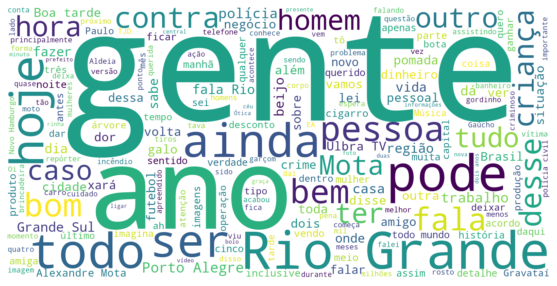

In [47]:
#NOVO MÓDULO PARA NÚVEM DE PALAVRAS
stopwords.extend(["né","aí","aqui","agora","vou",
                  "quer","vai","porque","lá","tá","olha","então"])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()


plt.show()